In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn

In [8]:
# Carica il dataset wine
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Seleziona 2 feature per la visualizzazione
X = df[['alcohol', 'malic_acid']].copy()

# Scala i dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

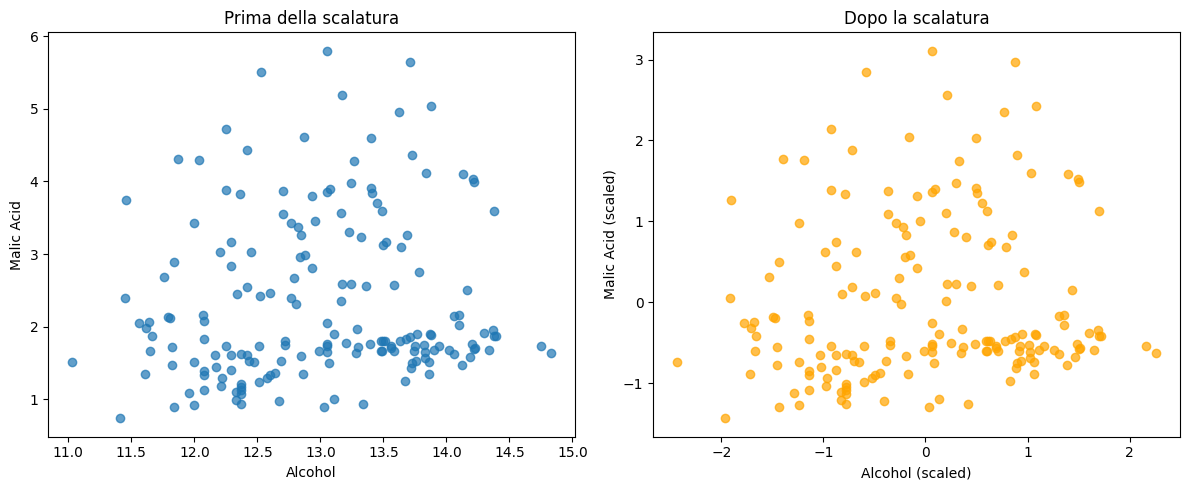

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Prima della scalatura
axes[0].scatter(X['alcohol'], X['malic_acid'], alpha=0.7)
axes[0].set_title('Prima della scalatura')
axes[0].set_xlabel('Alcohol')
axes[0].set_ylabel('Malic Acid')

# Dopo la scalatura
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.7, color='orange')
axes[1].set_title('Dopo la scalatura')
axes[1].set_xlabel('Alcohol (scaled)')
axes[1].set_ylabel('Malic Acid (scaled)')

plt.tight_layout()
plt.show()

In [11]:
# Carica i dati
x = data.data
y = data.target

# Dividi in training e test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# SVM con kernel lineare
svm_linear = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0))
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# SVM con kernel RBF
svm_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale'))
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

Report Linear Kernel:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

Report RBF Kernel:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



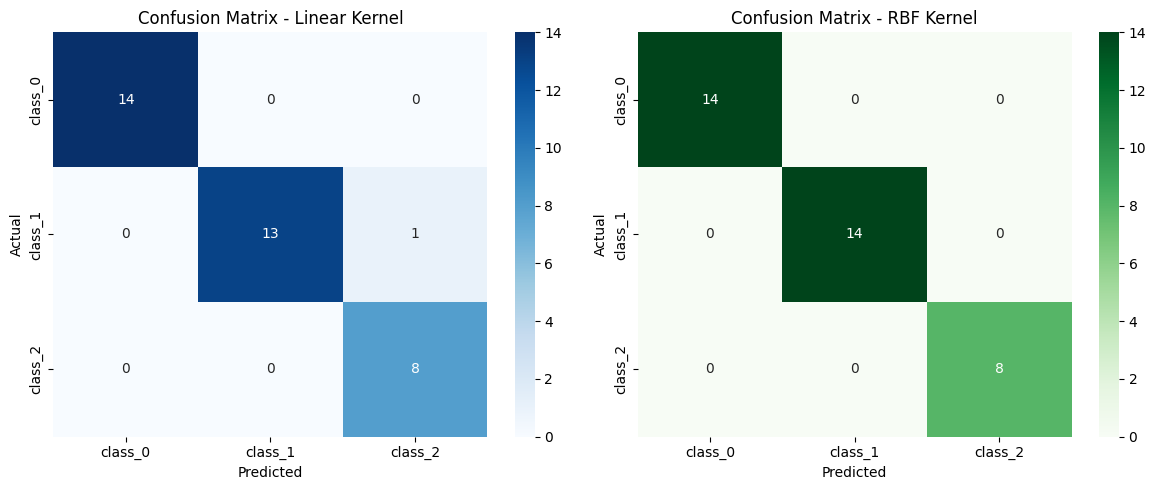

In [22]:
# Predizione
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf    = svm_rbf.predict(X_test)

# Valutazione
cm_linear = confusion_matrix(y_test, y_pred_linear)
print("Report Linear Kernel:\n", classification_report(y_test, y_pred_linear))

cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print("Report RBF Kernel:\n", classification_report(y_test, y_pred_rbf))


# Plot the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Confusion matrix for SVM with linear kernel
seaborn.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names, ax=axes[0])
axes[0].set_title('Confusion Matrix - Linear Kernel')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix for SVM with RBF kernel
seaborn.heatmap(cm_rbf, annot=True, fmt='d', cmap='Greens', xticklabels=data.target_names, yticklabels=data.target_names, ax=axes[1])
axes[1].set_title('Confusion Matrix - RBF Kernel')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()